In [4]:
#Code to upload files from storage to Google Colab
from google.colab import files
uploaded = files.upload()

Saving mushroom_data.csv to mushroom_data.csv


In [6]:
# Importing the libraries for data processing, model training, evaluation, and plotting
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt

In [7]:
# 1. Loading the Dataset
# Load the mushroom dataset
df = pd.read_csv("mushroom_data.csv")

# Display first rows to confirm dataset structure
print(df.head())

  class  cap-diameter cap-shape cap-surface cap-color does-bruise-or-bleed  \
0     p         15.26         x           g         o                    f   
1     p         16.60         x           g         o                    f   
2     p         14.07         x           g         o                    f   
3     p         14.17         f           h         e                    f   
4     p         14.64         x           h         o                    f   

  gill-attachment gill-spacing gill-color  stem-height  ...  stem-root  \
0               e          NaN          w        16.95  ...          s   
1               e          NaN          w        17.99  ...          s   
2               e          NaN          w        17.80  ...          s   
3               e          NaN          w        15.77  ...          s   
4               e          NaN          w        16.53  ...          s   

  stem-surface stem-color veil-type veil-color has-ring ring-type  \
0            y   

In [11]:
# 2. Checking any Missing Values
# This code will check the whole dataset to
#confirm whether there are missing values or not.
print("Missing values per column:")
print(df.isnull().sum())

# Handling the missing values for DT
for col in df.columns:
    if df[col].isnull().sum() > 0:
        df[col].fillna(df[col].mode()[0], inplace=True)

Missing values per column:
class                   0
cap-diameter            0
cap-shape               0
cap-surface             0
cap-color               0
does-bruise-or-bleed    0
gill-attachment         0
gill-spacing            0
gill-color              0
stem-height             0
stem-width              0
stem-root               0
stem-surface            0
stem-color              0
veil-type               0
veil-color              0
has-ring                0
ring-type               0
spore-print-color       0
habitat                 0
season                  0
dtype: int64


In [12]:
# 3. Outlier Handling by using the IQR method
# We will identify numeric columns in this dataset
num_cols = df.select_dtypes(include=['int64', 'float64']).columns

# Then we will loop through each numeric column and apply IQR filtering
for col in num_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_limit = Q1 - 1.5 * IQR
    upper_limit = Q3 + 1.5 * IQR

    # This will remove values outside acceptable range
    df = df[(df[col] >= lower_limit) & (df[col] <= upper_limit)]

print("Shape after removing outliers:", df.shape)

Shape after removing outliers: (53900, 21)


In [13]:
# 4. Encoding All Categorical Columns
# Machine learning models require numerical inputs,
#so Label Encoding converts text categories to numbers.
encoder = LabelEncoder()
for col in df.columns:
    df[col] = encoder.fit_transform(df[col])

In [14]:
# 5. Train-Test Split + Scaling
# Feature matrix (X) and target variable (y)
X = df.drop("class", axis=1)
y = df["class"]

# Standardization improves distance-based algorithms like KNN
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Splitting the dataset into 80% train and 20% test
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

In [15]:
# 6. Decision Tree (DT) Implementation
# Creating the model where entropy is used for information gain)
dt = DecisionTreeClassifier(criterion="entropy", random_state=42)

# Training the model
dt.fit(X_train, y_train)

# Prediction on test data
dt_pred = dt.predict(X_test)

# Compute the performance metrics
dt_accuracy = accuracy_score(y_test, dt_pred)
dt_precision = precision_score(y_test, dt_pred)
dt_recall = recall_score(y_test, dt_pred)
dt_f1 = f1_score(y_test, dt_pred)

# Print all results
print("\n=== Decision Tree Results ===")
print("Accuracy :", dt_accuracy)
print("Precision:", dt_precision)
print("Recall   :", dt_recall)
print("F1 Score :", dt_f1)
print("Confusion Matrix:\n", confusion_matrix(y_test, dt_pred))


=== Decision Tree Results ===
Accuracy : 0.9978664192949908
Precision: 0.9979767324228629
Recall   : 0.9981450252951096
F1 Score : 0.9980608717646067
Confusion Matrix:
 [[4838   12]
 [  11 5919]]


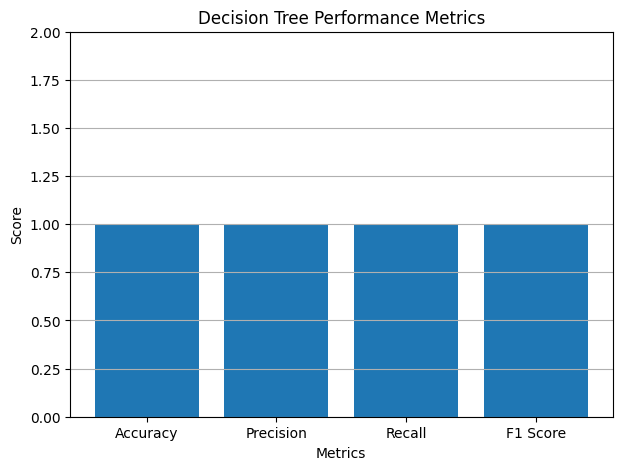

In [16]:
#Bar graph for Decision Tree (DT)
dt_scores = [dt_accuracy, dt_precision, dt_recall, dt_f1]
metrics = ["Accuracy", "Precision", "Recall", "F1 Score"]

plt.figure(figsize=(7,5))
plt.bar(metrics, dt_scores)
plt.title("Decision Tree Performance Metrics")
plt.xlabel("Metrics")
plt.ylabel("Score")
plt.ylim(0, 2)
plt.grid(axis='y')
plt.show()

In [17]:
# 7. KNN Implementation
# k = 5 (We will use K = 5)
knn = KNeighborsClassifier(n_neighbors=5)

# Train the KNN model
knn.fit(X_train, y_train)

# Prediction on test data
knn_pred = knn.predict(X_test)

# Compute performance metrics
knn_accuracy = accuracy_score(y_test, knn_pred)
knn_precision = precision_score(y_test, knn_pred)
knn_recall = recall_score(y_test, knn_pred)
knn_f1 = f1_score(y_test, knn_pred)

# Print all results
print("\n=== KNN Results ===")
print("Accuracy :", knn_accuracy)
print("Precision:", knn_precision)
print("Recall   :", knn_recall)
print("F1 Score :", knn_f1)
print("Confusion Matrix:\n", confusion_matrix(y_test, knn_pred))


=== KNN Results ===
Accuracy : 0.9993506493506493
Precision: 0.999831223628692
Recall   : 0.9989881956155143
F1 Score : 0.9994095318431042
Confusion Matrix:
 [[4849    1]
 [   6 5924]]


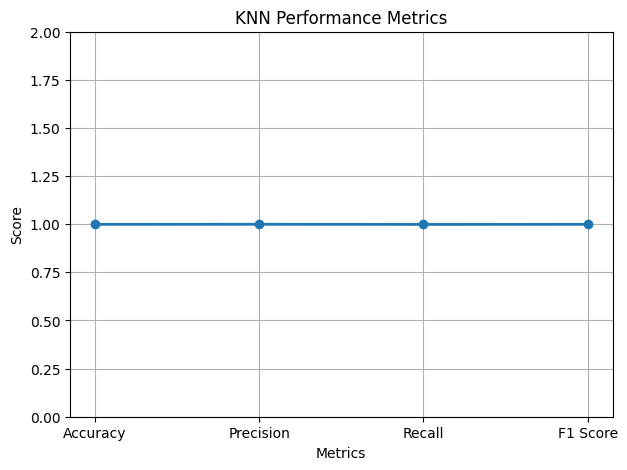

In [18]:
#Line Graph for KNN (K-Nearest Neighbor)
knn_scores = [knn_accuracy, knn_precision, knn_recall, knn_f1]

plt.figure(figsize=(7,5))
plt.plot(metrics, knn_scores, marker='o', linewidth=2)
plt.title("KNN Performance Metrics")
plt.xlabel("Metrics")
plt.ylabel("Score")
plt.ylim(0, 2)
plt.grid(True)
plt.show()
